In [1]:
#X Sotes Sales 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import math

import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv("sales.csv")

#store_sales = pd.read_csv("storeSales.csv",encoding='ISO-8859-1')

stores = pd.read_csv("stores.csv")

features = pd.read_csv("features.csv")

In [4]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [5]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [6]:
sales.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [7]:
sales["Store"].nunique()

45

In [8]:
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [9]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [10]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [11]:
store_1_sales = sales.loc[sales['Store'] == 1]
store_1_sales = pd.DataFrame(store_1_sales)

features_1 = features.loc[features["Store"] == 1]
features_1 = features_1.drop(columns=["IsHoliday","Store"])
features_1 = pd.DataFrame(features_1)

features_1.head()

,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [54]:
features_1.describe()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,182.000000,182.000000,90.000000,73.000000,89.000000,90.000000,90.000000,169.000000,169.000000
mean,66.912033,3.259242,8536.592778,3346.401918,1670.797978,3653.631444,4428.307667,217.271679,7.440994
std,14.134829,0.393400,9380.362324,7976.082153,9829.739136,5708.012818,2933.243801,5.004205,0.533324
min,35.400000,2.514000,332.170000,0.500000,0.100000,8.000000,303.320000,210.337426,6.314000
25%,55.322500,2.873250,3667.810000,92.000000,9.800000,454.500000,2672.580000,211.746754,6.908000
50%,67.510000,3.354000,6170.165000,292.100000,47.210000,1627.555000,3736.910000,216.041053,7.742000
75%,79.857500,3.574000,10262.677500,3163.890000,209.620000,3800.232500,5898.052500,221.883779,7.838000
max,91.650000,3.907000,72937.290000,46011.380000,74910.320000,32403.870000,20475.320000,225.170160,8.106000


In [44]:
import plotly.express as px


In [61]:
fig = px.box(features_1, x= "MarkDown5")

fig.show()

In [12]:
store_1_sales.shape, features_1.shape

((10244, 5), (182, 10))

In [13]:
df_1 = store_1_sales.set_index("Date").join(features_1.set_index("Date"))

df_1.head()


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Date,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2010-02-05,1,2,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2010-02-05,1,3,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2010-02-05,1,4,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2010-02-05,1,5,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [14]:
df_1 = df_1.drop(columns=["Store"])



In [15]:
# Here, we join two data_frames.




df_1.dropna(inplace = True)

df_1.head()

,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Date,,,,,,,,,,,,
2011-11-11,1,18689.54,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866
2011-11-11,2,44936.47,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866
2011-11-11,3,9959.64,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866
2011-11-11,4,36826.52,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866
2011-11-11,5,31002.65,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866


In [16]:
df_1["IsHoliday"] = df_1["IsHoliday"].astype(int) #"hand-one" encoding

df_1.head()

,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Date,,,,,,,,,,,,
2011-11-11,1,18689.54,0,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866
2011-11-11,2,44936.47,0,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866
2011-11-11,3,9959.64,0,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866
2011-11-11,4,36826.52,0,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866
2011-11-11,5,31002.65,0,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866


In [17]:
Independents = []

for col in df_1.columns:
    if col != "Date" and col != "Weekly_Sales":
        Independents.append(col)
print(Independents)

X = df_1[Independents]
y= df_1["Weekly_Sales"]



['Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']


In [18]:
print(X.head())


            Dept  IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
Date                                                                         
2011-11-11     1          0        59.11       3.297    10382.9    6115.67   
2011-11-11     2          0        59.11       3.297    10382.9    6115.67   
2011-11-11     3          0        59.11       3.297    10382.9    6115.67   
2011-11-11     4          0        59.11       3.297    10382.9    6115.67   
2011-11-11     5          0        59.11       3.297    10382.9    6115.67   

            MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
Date                                                                   
2011-11-11     215.07    2406.62    6551.42  217.998085         7.866  
2011-11-11     215.07    2406.62    6551.42  217.998085         7.866  
2011-11-11     215.07    2406.62    6551.42  217.998085         7.866  
2011-11-11     215.07    2406.62    6551.42  217.998085         7.866  
2011-11-11     215.07

In [19]:
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from collections import Counter
from sklearn import linear_model


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression
lr_model = linear_model.LinearRegression()

lr_model.fit(X_train,y_train)



LinearRegression()

In [20]:
from sklearn.metrics import r2_score

y_pred = lr_model.predict(X_test)

#print(math.ceil(y_pred[10]), math.ceil(y_test[10]))

score = r2_score(y_test,y_pred)

print(score)

0.12555828197914942


In [21]:
print(y_test[1]), print(y_pred[1])



87195.4
38736.89713238808


(None, None)

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train)

X_test_poly = poly_features.fit_transform(X_test)

In [23]:
polynomila_regression = LinearRegression()

polynomila_regression.fit(X_train_poly,y_train)

LinearRegression()

In [24]:
y_pred_poly = polynomila_regression.predict(X_test_poly)

poly_score = r2_score(y_test,y_pred_poly)

print(poly_score)

0.33617189526204694


In [25]:
#Deciosion tree regressor 

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

regressor.fit(X_train,y_train)

y_pred_regressor = regressor.predict(X_test)

score_regressor = r2_score(y_test, y_pred_regressor)


print(y_pred_regressor)
print(score_regressor)


[ 3.3041490e+04  8.2674870e+04  5.7424000e+03  7.6138440e+04
  1.0288310e+04  8.6242680e+04  5.0704900e+03  3.8407780e+04
  1.6528290e+04  9.7236300e+03  1.4859100e+03  1.1424420e+04
  1.6034000e+04  6.8240500e+03  7.5637200e+03  1.6916290e+04
  7.8902100e+03  2.4836020e+04  3.9608100e+03  4.5440000e+03
  1.0484080e+04  7.9600000e+02  6.8443220e+04  3.2851060e+04
  1.3389350e+04  1.2485780e+04  3.1533840e+04  1.4358300e+04
  8.4069300e+03  1.0789200e+03  3.2431810e+04  3.7507930e+04
  3.1575200e+03  2.8492340e+04  4.4708450e+04  2.1103420e+04
  1.4117360e+04  5.1137420e+04  7.6603530e+04  4.6671600e+03
  6.1873330e+04  5.3525500e+03  3.7535690e+04  3.3855280e+04
  2.3838330e+04  8.7988400e+03  2.0833840e+04  1.3415730e+04
  2.0021350e+04  9.4857000e+02  1.5159940e+04  5.4858600e+03
  6.5356300e+03  2.5810000e+02  1.0172390e+04  5.1849500e+03
  2.2800000e+03  3.7693880e+04  2.5810000e+02  4.0787890e+04
  1.9261990e+04  1.2687470e+04  2.8212000e+03  1.2691600e+03
  6.2337800e+03  2.40430

In [26]:
from sklearn.metrics import mean_squared_error

mean_error = mean_squared_error(y_test,y_pred_regressor)

print(mean_error)

38551791.03340694


In [27]:
import random

m = random.randrange(100)

m

72

In [28]:
print(y_pred_regressor[m],y_test[m])

1030.06 1241.1


In [29]:
#random forest regressor

from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

random_forest.fit(X_train, y_train)

y_random_forest = random_forest.predict(X_test)

print(y_random_forest[m],y_test[m])



1068.6081999999994 1241.1


In [30]:
print(f"r2_score for random forest is {r2_score(y_test,y_random_forest)}")


r2_score for random forest is 0.96230108929041


In [31]:
from sklearn import metrics

metrics.mean_squared_error(y_test,y_random_forest)


29104009.417874373

In [32]:
errors = np.abs(y_test - y_random_forest)  # Absolute errors

# Identify the indices of the worst predictions
worst_predictions_idx = np.argsort(errors)[-5:]  # Top 5 worst predictions

worst_predictions_idx[:10]


Date
2012-03-09    214
2012-08-31    572
2012-10-26    341
2012-03-23    280
2012-01-13    523
Name: Weekly_Sales, dtype: int64

In [33]:
print(X_test.iloc[220])

Dept                7.000000
IsHoliday           0.000000
Temperature        43.930000
Fuel_Price          3.158000
MarkDown1        4640.650000
MarkDown2          19.000000
MarkDown3         105.020000
MarkDown4        3639.420000
MarkDown5       14461.820000
CPI               218.961846
Unemployment        7.866000
Name: 2011-12-09, dtype: float64


In [34]:
print(abs(y_test[220]- y_random_forest[220]))
print(abs(y_test[572]-y_random_forest[572]))
print(abs(y_test[523]- y_random_forest[523]))

23023.003699999994
25192.89819999999
44881.59869999997


In [35]:
(df_1.IsHoliday == True).sum(), (df_1.IsHoliday == False).sum()

(292, 2654)

In [36]:
# There are more instances of "non_holidays" than "holidays", so we take an average of the sum(s).

True_Sum = 0

for ind,row in df_1.iterrows():
    if row["IsHoliday"] == True:
        True_Sum += row["Weekly_Sales"]
True_Sum /= 723


False_Sum = 0
for ind,row in df_1.iterrows():
    if row["IsHoliday"] == False:
        False_Sum += row["Weekly_Sales"]

False_Sum /= 9521

print(math.ceil(True_Sum), math.ceil(False_Sum))




9676 6229


In [37]:
df_1['MarkDown2'].drop_duplicates().sort_values()


Date
2012-03-30        0.50
2012-09-14        7.00
2012-03-16        7.50
2012-09-21        7.64
2012-03-23        9.48
2012-06-01       12.00
2011-12-09       19.00
2012-10-26       31.75
2012-09-07       35.74
2011-12-23       40.48
2012-07-13       45.20
2011-12-16       67.00
2011-12-02       68.00
2012-07-06       94.40
2011-11-25       98.00
2012-08-31      102.32
2012-06-15      109.60
2012-06-08      116.80
2012-08-03      119.98
2012-08-17      137.86
2012-03-09      151.88
2012-06-22      171.25
2012-08-10      245.00
2011-11-18      254.39
2012-08-24      260.06
2012-07-20      313.72
2012-07-27      389.02
2012-04-20      612.02
2012-01-27     1082.74
2012-03-02     1569.00
2012-01-20     2807.19
2012-04-13     3288.69
2012-02-03     3579.21
2011-11-11     6115.67
2012-02-10     6927.23
2012-02-24     7556.01
2012-01-13     8025.87
2012-02-17    11062.27
2012-01-06    21813.16
2011-12-30    46011.38
Name: MarkDown2, dtype: float64

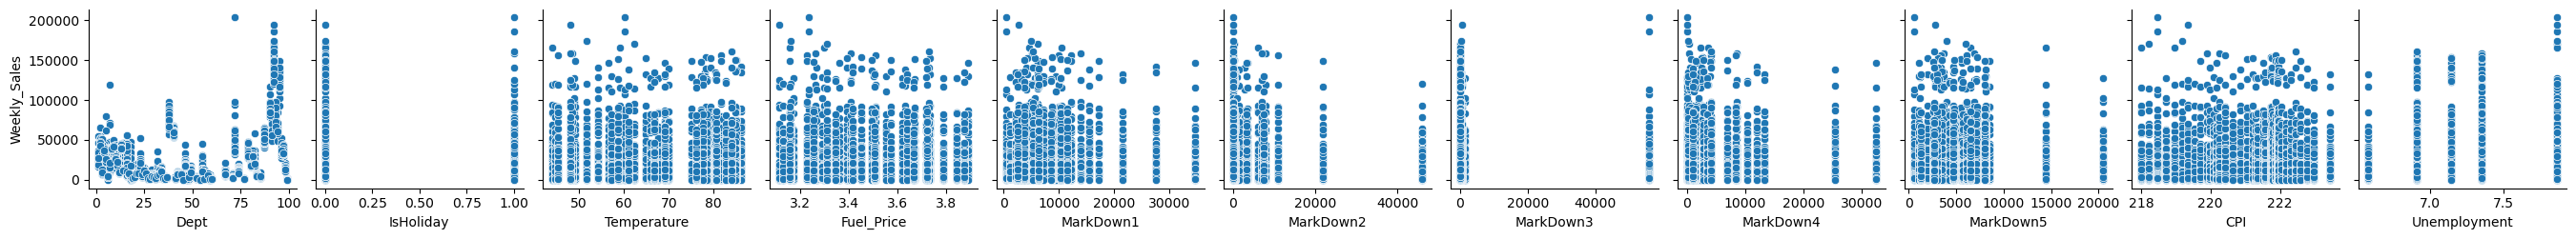

In [38]:
the_independe_columns = []
for col in df_1.columns:
    if col != "Weekly_Sales":
        the_independe_columns.append(col)

sns.pairplot(
    df_1,
    y_vars = ["Weekly_Sales"],
    x_vars = the_independe_columns
)

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

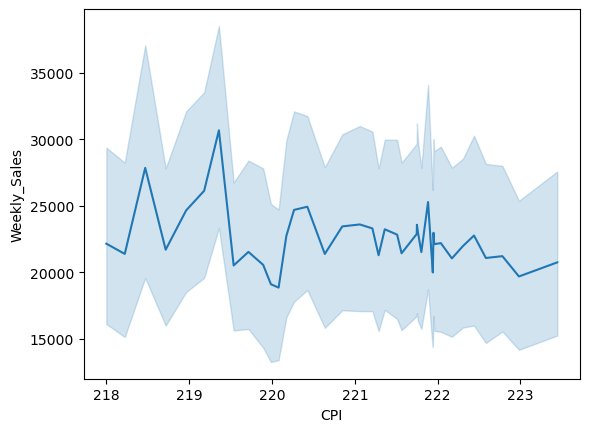

In [39]:
sns.lineplot(x= "CPI", y = "Weekly_Sales", data = df_1)

In [40]:
df_1.nunique()

Dept              75
Weekly_Sales    2916
IsHoliday          2
Temperature       41
Fuel_Price        41
MarkDown1         41
MarkDown2         40
MarkDown3         40
MarkDown4         41
MarkDown5         41
CPI               41
Unemployment       5
dtype: int64

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

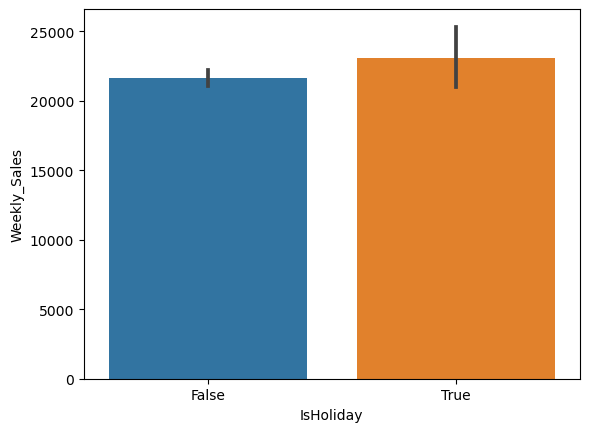

In [41]:
sns.barplot(store_1_sales, x = "IsHoliday", y = "Weekly_Sales")

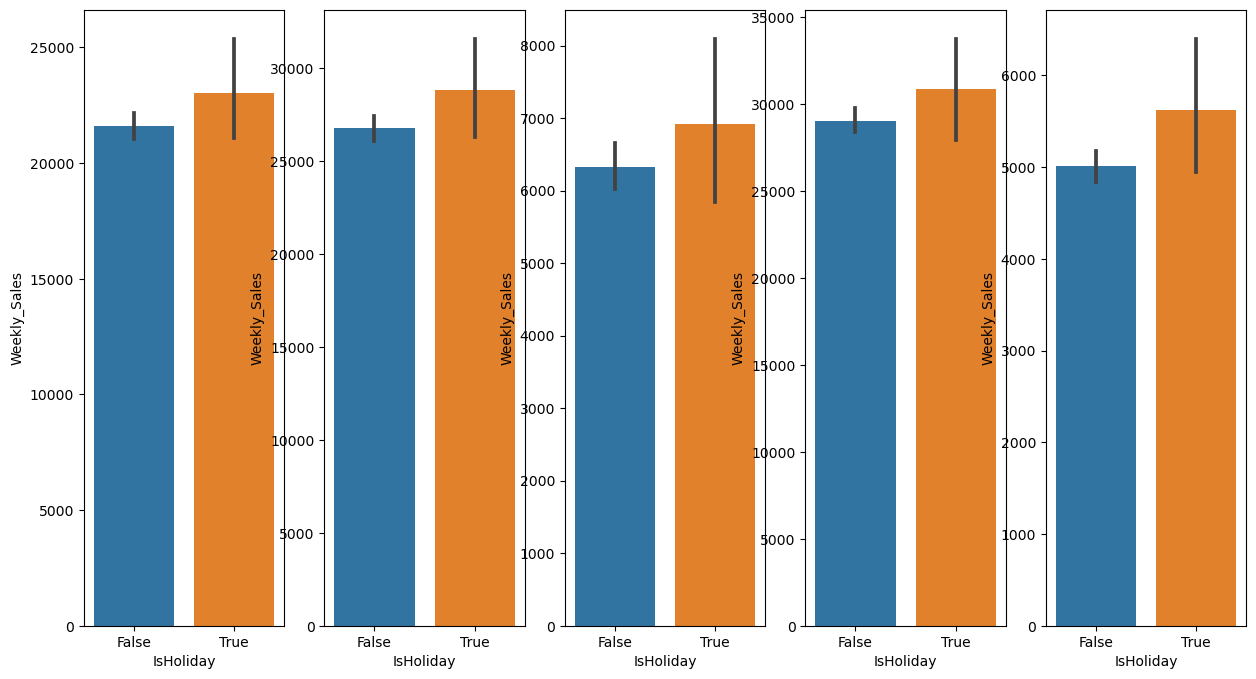

In [42]:
figure, axes = plt.subplots(1,5, sharex=True, figsize = (15,8))


for i in range(1,6):
        store_i_sales = sales.loc[sales['Store'] == i]
        store_i_sales = pd.DataFrame(store_i_sales)
        sns.barplot(store_i_sales, ax = axes[i-1] , x = "IsHoliday", y = "Weekly_Sales")



In [43]:
# 